# Classification 2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import sklearn.tree as tree
from IPython.display import Image
from six import StringIO
from sklearn.datasets import load_wine, load_iris, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
# 1st feature
weather = ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny",
           "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"]

# 2nd feature
temp = ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"]

# class
play = ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]

In [3]:
encoder = LabelEncoder()

weather_encoded = encoder.fit_transform(weather)
temp_encoded = encoder.fit_transform(temp)
y = encoder.fit_transform(play)

print("Weather:", weather_encoded)
print("Temp:   ", temp_encoded)
print("Play:   ", y)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp:    [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play:    [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [5]:
gauss_nb = GaussianNB()
gauss_nb.fit(features, y)

predictions = gauss_nb.predict(features)

print("Target     :", y)
print("Prediction :", predictions)
print("Accuracy score:", gauss_nb.score(features, y))

Target     : [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Prediction : [0 0 1 1 1 1 1 0 0 1 0 1 1 1]
Accuracy score: 0.7142857142857143


In [6]:
wine = load_wine()

print("features:", wine.feature_names)
print("labels:", wine.target_names)
print("dataset shape:", wine.data.shape)

features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
labels: ['class_0' 'class_1' 'class_2']
dataset shape: (178, 13)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data,
    wine.target,
    test_size=.2,
    stratify=wine.target,
    random_state=11
)
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [8]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

train_predictions = gauss_nb.predict(X_train)
test_predictions = gauss_nb.predict(X_test)

print("trainng accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

trainng accuracy: 0.9929577464788732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.98      0.99        57
           2       0.97      1.00      0.99        38

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

test accuracy: 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [9]:
column_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
diabetes = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv",
    header=0,
    names=column_names,
)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# features = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age"]
# X = diabetes[features]
# y = diabetes["label"]

X = diabetes.drop(columns="label")
y = diabetes["label"]

In [12]:
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [14]:
y.value_counts()

0    500
1    268
Name: label, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=11, stratify=y)

print("Training size:", X_train.shape)
print(y_train.value_counts())
print()
print("Test size:", X_test.shape)
print(y_test.value_counts())

Training size: (614, 8)
0    400
1    214
Name: label, dtype: int64

Test size: (154, 8)
0    100
1     54
Name: label, dtype: int64


In [16]:
214/614, 54/154    # class 1 proportion in each training and test set

(0.3485342019543974, 0.35064935064935066)

In [17]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

train_predictions = tree_clf.predict(X_train)
test_predictions = tree_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

training accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

test accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.60      0.67      0.63        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.73       154



In [18]:
dot_data = StringIO()
tree.export_graphviz(
    tree_clf,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=diabetes.drop(columns="label").columns,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

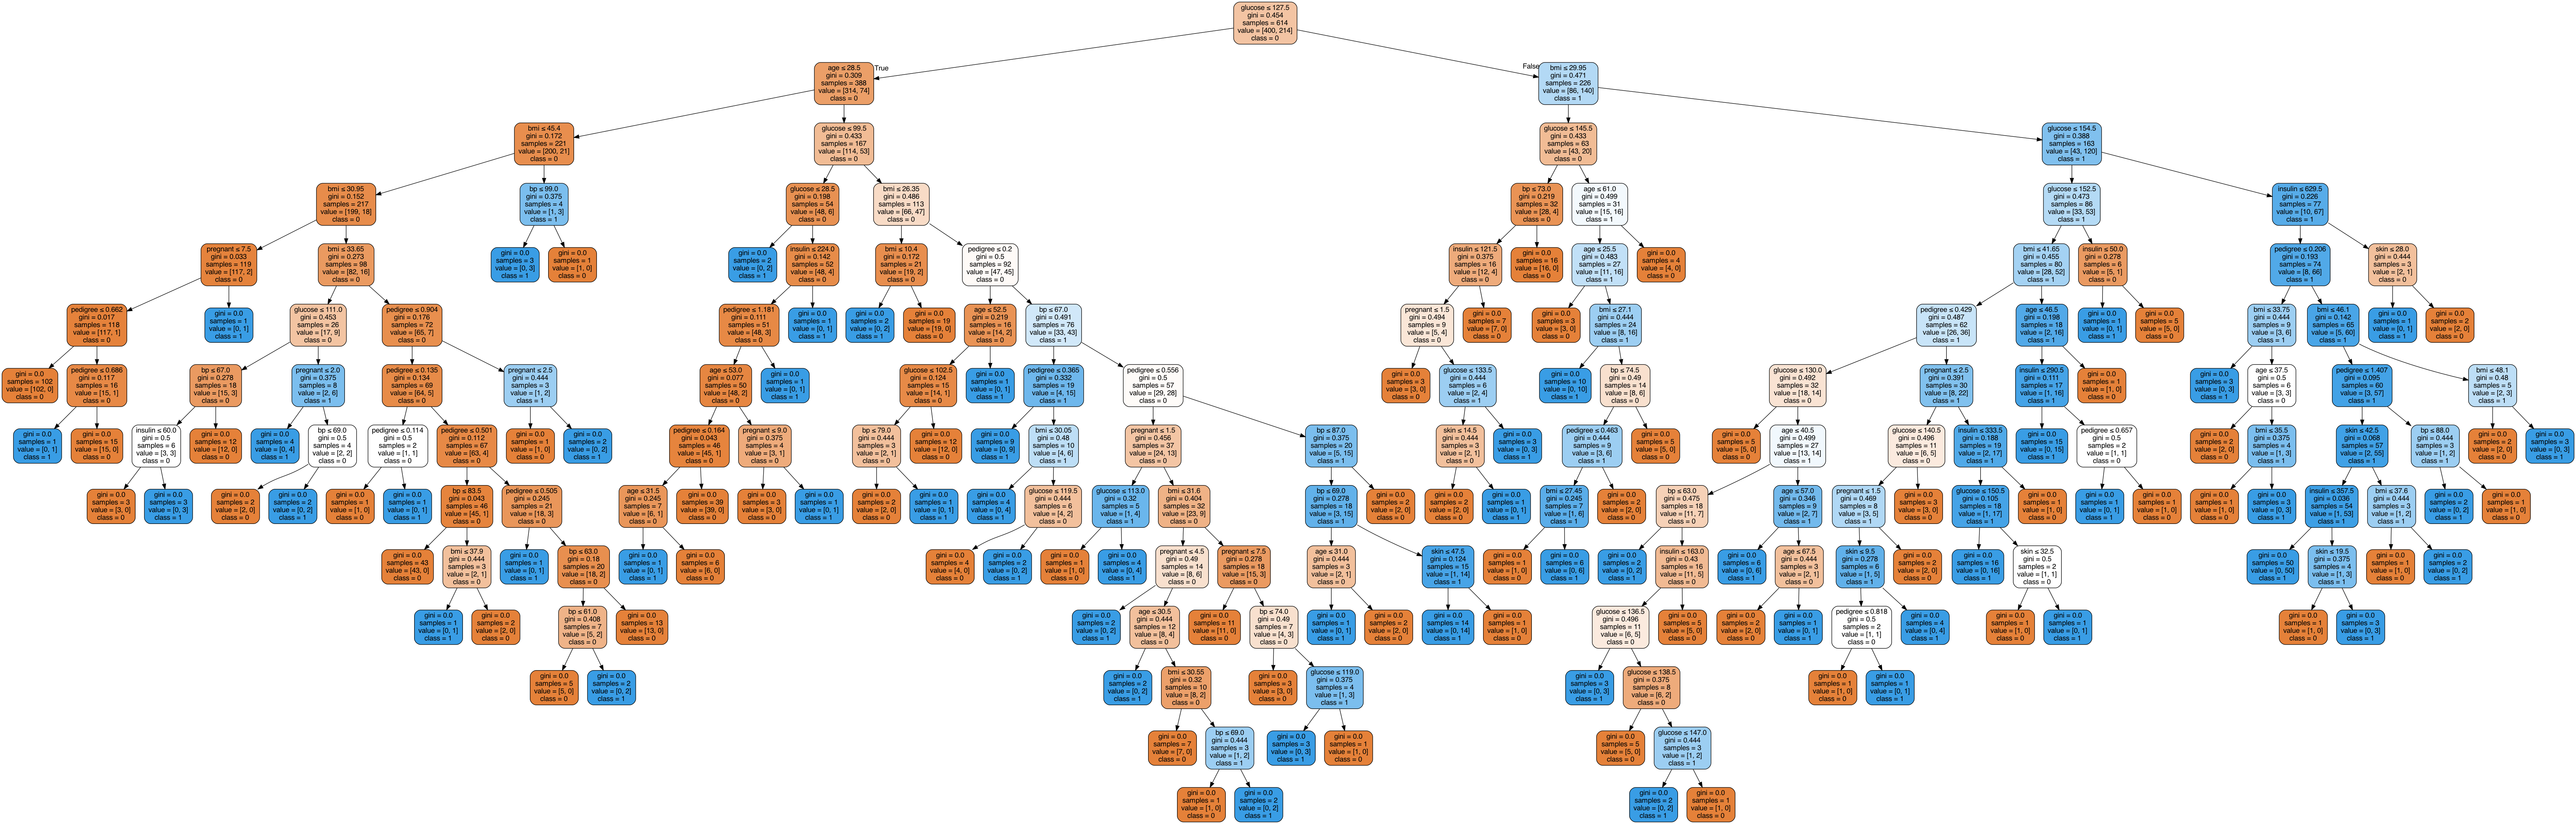

In [19]:
Image(graph.create_png())

In [20]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10)
tree_clf.fit(X_train, y_train)

train_predictions = tree_clf.predict(X_train)
test_predictions = tree_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

training accuracy: 0.8094462540716613
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       400
           1       0.74      0.71      0.72       214

    accuracy                           0.81       614
   macro avg       0.79      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614

test accuracy: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



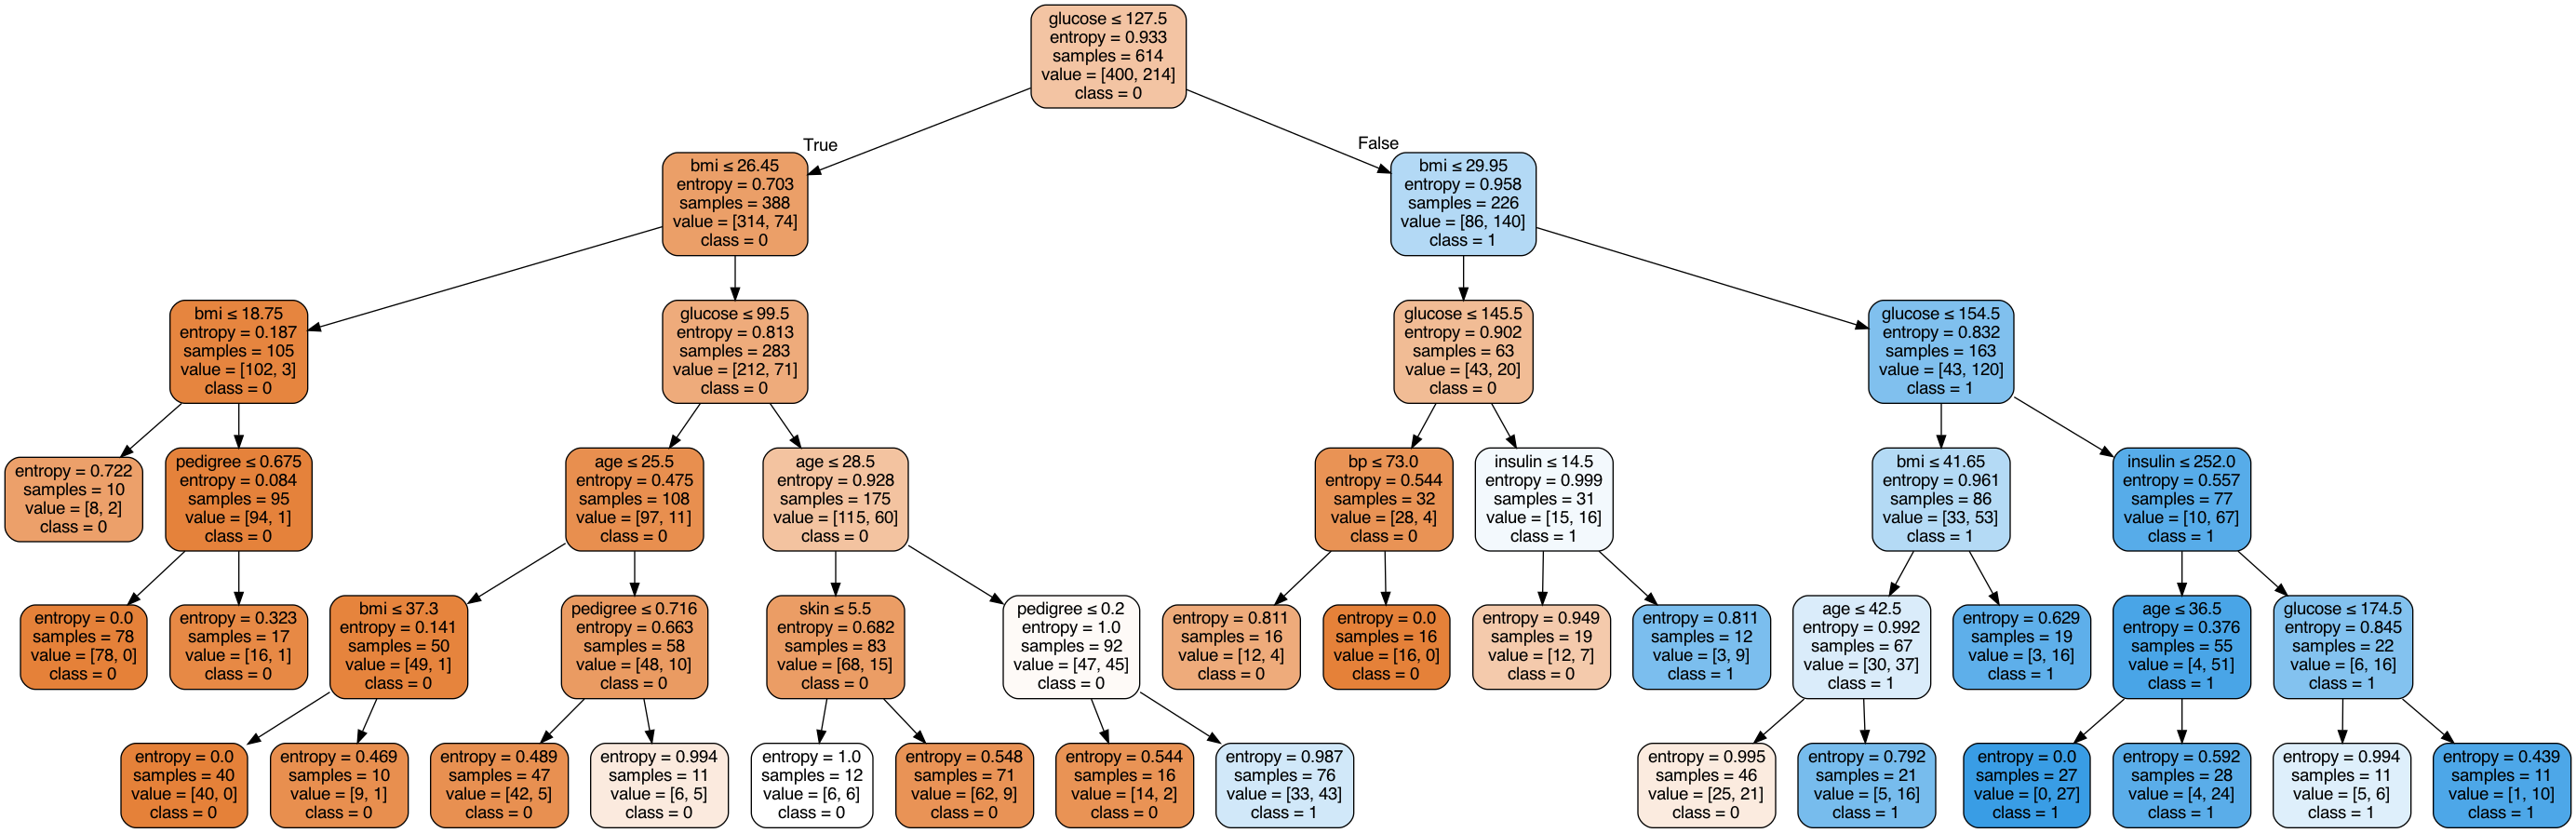

In [21]:
dot_data = StringIO()
tree.export_graphviz(
    tree_clf,
    out_file=dot_data,
    class_names=["0", "1"],
    feature_names=diabetes.drop(columns="label").columns,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
tree_clf.predict([[9, 150, 50, 20, 88, 25, .5, 55]])

array([1])

In [23]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
df_iris = pd.DataFrame({
    "sepal_length": iris.data[:, 0],
    "sepal_width": iris.data[:, 1],
    "petal_length": iris.data[:, 2],
    "petal_width": iris.data[:, 3],
    "species": iris.target
})
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris.drop(columns="species"), df_iris["species"],
    test_size=.2, random_state=11
)

print("Training size:", X_train.shape)
print(y_train.value_counts())
print()
print("Test size:", X_test.shape)
print(y_test.value_counts())

Training size: (120, 4)
0    41
1    40
2    39
Name: species, dtype: int64

Test size: (30, 4)
2    11
1    10
0     9
Name: species, dtype: int64


In [26]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
test_predictions = rf_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

training accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      0.95      0.95        40
           2       0.95      0.95      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

test accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [27]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=iris.feature_names)
feature_importances

sepal length (cm)    0.149439
sepal width (cm)     0.000000
petal length (cm)    0.466519
petal width (cm)     0.384042
dtype: float64

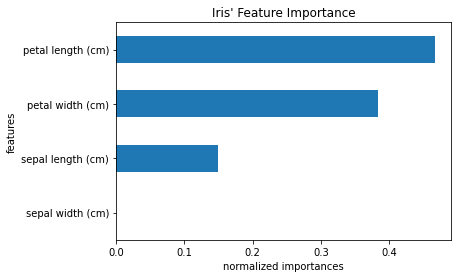

In [28]:
feature_importances.sort_values(ascending=True).plot(kind="barh")
plt.title("Iris' Feature Importance")
plt.xlabel("normalized importances")
plt.ylabel("features")
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df_iris.drop(columns=["sepal_length", "sepal_width", "species"]), df_iris["species"],
    test_size=.2, random_state=11
)

print("Training size:", X_train.shape)
print(y_train.value_counts())
print()
print("Test size:", X_test.shape)
print(y_test.value_counts())

Training size: (120, 2)
0    41
1    40
2    39
Name: species, dtype: int64

Test size: (30, 2)
2    11
1    10
0     9
Name: species, dtype: int64


In [30]:
rf_clf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf_clf.fit(X_train, y_train)

train_predictions = rf_clf.predict(X_train)
test_predictions = rf_clf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

training accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

test accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [31]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [32]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=.3, random_state=11)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (398, 30)
Test size: (171, 30)


In [33]:
svm_cf = SVC()
svm_cf.fit(X_train, y_train)

train_predictions = svm_cf.predict(X_train)
test_predictions = svm_cf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions, target_names=cancer.target_names))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions, target_names=cancer.target_names))

training accuracy: 0.9120603015075377
              precision    recall  f1-score   support

   malignant       0.98      0.79      0.87       151
      benign       0.88      0.99      0.93       247

    accuracy                           0.91       398
   macro avg       0.93      0.89      0.90       398
weighted avg       0.92      0.91      0.91       398

test accuracy: 0.8947368421052632
              precision    recall  f1-score   support

   malignant       0.98      0.72      0.83        61
      benign       0.87      0.99      0.92       110

    accuracy                           0.89       171
   macro avg       0.92      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



In [34]:
svm_cf = SVC(kernel="linear", C=100)
svm_cf.fit(X_train, y_train)

train_predictions = svm_cf.predict(X_train)
test_predictions = svm_cf.predict(X_test)

print("training accuracy:", accuracy_score(y_train, train_predictions))
print(classification_report(y_train, train_predictions, target_names=cancer.target_names))

print("test accuracy:", accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions, target_names=cancer.target_names))

training accuracy: 0.9798994974874372
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97       151
      benign       0.99      0.98      0.98       247

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

test accuracy: 0.9415204678362573
              precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        61
      benign       0.95      0.95      0.95       110

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

